In [ ]:
a = [1,2,3]
all(a)

In [ ]:
import rospy
master = rospy.get_master()
target = master.target
target._ServerProxy__host.split(":")

In [ ]:
import os

master = os.getenv('ROS_MASTER_URI')
print(master)
host, port = master.split("//")[1].split(":")
host, int(port)

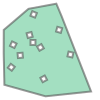

In [78]:
from roomor.generator import CubeRoomGenerator
# import rospy

# rospy.init_node("asdf")

gazebo_proxy = {
            'ros_host': 'localhost', 
            'ros_port': 11311, 
            'gazebo_host': 'localhost',
            'gazebo_port': 11345
}

room_generator_params = dict()
room_generator_params['obstacle_count'] = 10
room_generator_params['obstacle_size'] = 0.4
room_generator_params['target_size'] = 0.2
room_generator_params['room_length_max'] = 8
room_generator_params['room_mass_min'] = 36
room_generator_params['room_mass_max'] = 40
room_generator_params['room_wall_height'] = 0.8
room_generator_params['room_wall_thickness'] = 0.05
room_generator_params['agent_size'] = 0.4
room_generator_params['wall_threshold'] = 0.01

c = CubeRoomGenerator(**room_generator_params, **gazebo_proxy)
g = c.generate_new()
g.spawn_all()


In [79]:
obs = g.obstacle_pose['positions'][:,:2]
obs

array([[ 0.9355303 ,  1.62578554],
       [-1.44907213,  1.20851819],
       [-0.31026913, -2.33812484],
       [-2.77342069,  0.42400903],
       [ 1.85215691, -0.3707085 ],
       [-1.1225323 ,  2.87675511],
       [-2.93175055, -1.40197269],
       [-1.17801936,  0.60524393],
       [-0.57589779,  0.2039558 ],
       [-2.20884094, -0.43987843]])

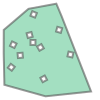

In [81]:
p = g.get_freespace_poly()
p

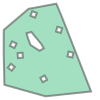

In [80]:
freezone = g.get_freezone_poly()
freezone

In [49]:
pos = trimesh.path.polygons.sample(freezone, 1)
poss = np.full([len(obs),2], pos)
print(pos)
np.min(np.linalg.norm(pos-obs, axis=1))

[[1.3715597 1.7961072]]


0.6607152432485531

In [77]:
thresh = 1.0

poses = trimesh.path.polygons.sample(freezone, 100)
pos = [0,0]
for p in poses:
    poss = np.full([len(obs),2], p)
    min_norm = np.min(np.linalg.norm(poss-obs, axis=1))
    if min_norm > 1.0:
        pos = p
        print(min_norm)
        break
        
print(pos)

1.3195149308847052
[0.06668089 2.66066179]


In [ ]:
from PIL import Image
import numpy as np

data = g.get_occupancy_grid(p, [0.1,0.1], np.pi/4)
img = Image.fromarray(data.reshape((512,512)), 'L')
img.show()

In [62]:
import numpy as np
import shapely
import trimesh

angle = np.pi/4

a = np.identity(3)
a[:2, 2] = [1,1]
# a = np.array([[1,0,1],[0,1,1], [0,0,1]])
b = np.array([[np.cos(angle),-np.sin(angle),0], [np.sin(angle),np.cos(angle),0], [0,0,1]])
mat = np.dot(b,a)
td = shapely.affinity.affine_transform(p, [mat[0,0],mat[0,1],mat[1,0],mat[1,1],mat[0,2],mat[1,2]])
trimesh.path.polygons.plot_polygon([p,td])

AttributeError: 'numpy.ndarray' object has no attribute 'is_empty'

In [ ]:
def asdf(a,b,c,d,e,f=2):
    print(a,b,c,d,e,f)
    
class gh:
    def __init__(self, j1, j2):
        self.j1 = j1
        self.j2 = j2
        pass
    
h = gh(**{'j2':1}, **{'j1':2})
print(h.j1)
    
asdf(**{'a':1, 'b':2}, **{'c':1, 'd':1,'e':1})